# **Project: Amazon Product Recommendation System**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

As a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.

* Blanks '_______' are provided in the notebook that needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# Fill in the blank" or "# Complete the code". Running incomplete code may throw an error.
* Remove the blank and state your observations in detail wherever the mark down says 'Write your observations here:_________'
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final report.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [3]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162667 sha256=d4578412d6dae3a4676624fda0b6f6d3f5e2b997abf8af2455ac2ee38df28b56
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


## **Importing the necessary libraries and overview of the dataset**

In [4]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

### **Loading the data**

In [5]:
# Import the dataset
data = pd.read_csv('/content/drive/MyDrive/Data Science - GL/GL_Elective_Projects/RecommendationSystem/ratings_Electronics.csv', header = None) # There are no headers in the data file



In [6]:
df_copy = data.copy()
df_copy.columns = ['user_id', 'prod_id', 'rating', 'timestamp'] # Adding column names

df_copy = df_copy.drop('timestamp', axis = 1) # Dropping timestamp

df = df_copy.copy(deep = True) # Copying the data to another DataFrame

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [7]:

df.head()

,user_id,prod_id,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [8]:
df.shape

(7824482, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [ ]:
import sys
sys.getsizeof(df['user_id'])

553520599

In [ ]:
sys.getsizeof(df['prod_id'])

524240438

In [ ]:
# user_id contains combination of letters & digits. So we will convert the column to type 'string'
df['user_id']= df['user_id'].astype(str)
sys.getsizeof(df['user_id'])

553520599

In [ ]:
df['prod_id']= df['prod_id'].astype(str)

In [ ]:
sys.getsizeof(df['prod_id'])

524240438

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  object 
 1   prod_id  object 
 2   rating   float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [ ]:
df.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [11]:
df['user_id'].nunique()

4201696

In [10]:
df['prod_id'].nunique()

476002

In [12]:
pd.options.display.float_format = '{:.5f}'.format
df['rating'].describe()

count   7824482.00000
mean          4.01234
std           1.38091
min           1.00000
25%           3.00000
50%           5.00000
75%           5.00000
max           5.00000
Name: rating, dtype: float64

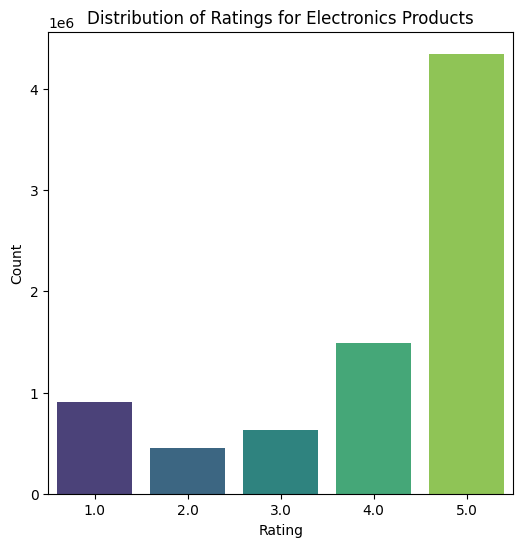

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color palette
colors = sns.color_palette('viridis', len(df['rating'].unique()))

# Create the bar plot and provide observations
plt.figure(figsize=(6, 6))
sns.countplot(x='rating', data=df, palette=colors)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Electronics Products')
plt.show()

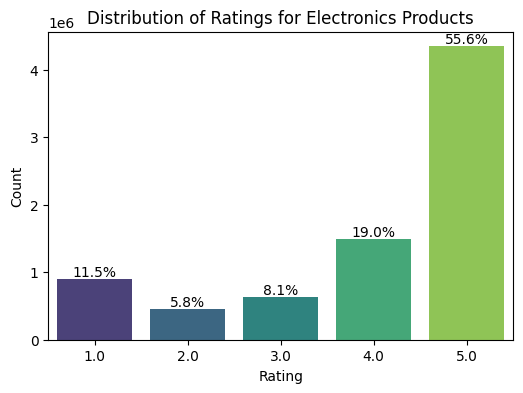

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color palette
colors = sns.color_palette('viridis', len(df['rating'].unique()))

# Create the bar plot and provide observations
plt.figure(figsize=(6,4))
ax = sns.countplot(x='rating', data=df, palette=colors)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Electronics Products')

# Add percentage labels on top of each bar
total = len(df['rating'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.005 * total  # Adjust the position of the label
    #y = -0.02 * total
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [ ]:
#Practice
import pandas as pd

# Create a sample dataframe
df_temp = pd.DataFrame({
    'user_id': ['User1', 'User1', 'User2', 'User2', 'User3'],
    'prod_id': ['Product1', 'Product2', 'Product1', 'Product2', 'Product3'],
    'quantity': [1, 2, 3, 4, 5],
    'price': [10, 20, 30, 40, 50]
})

# Group by 'user_id' and 'prod_id' and calculate the sum
result = len(df_temp.groupby(['user_id', 'prod_id']).sum())
result2 = len(df_temp.groupby(['user_id', 'prod_id']).count())
print(result)

print('***********')
print(result2)

5
***********
5


In [ ]:
totalNumOfRatings = len(df.groupby(['user_id', 'prod_id']).count())
totalNumOfRatings

7824482

In [ ]:
df.groupby(['user_id', 'prod_id']).count()['rating'].sum()

7824482

**Observation 1**:
There are 476002 items of electronics in the dataset.
As per the number of unique users and books, there is a possibility of 4201696 * 476002 = 2,000,015,699,392  
ratings in the dataset. But we only have 7,824,482 ratings, i.e., not every user has rated every product in the dataset. So, we can build a recommendation system to recommend products to users which they have not interacted with.

**Observation 2:**
- The **sum of User ratings per Product interaction is equal to the total number of observations**, which implies that **there is only one interaction between a product and a user**.

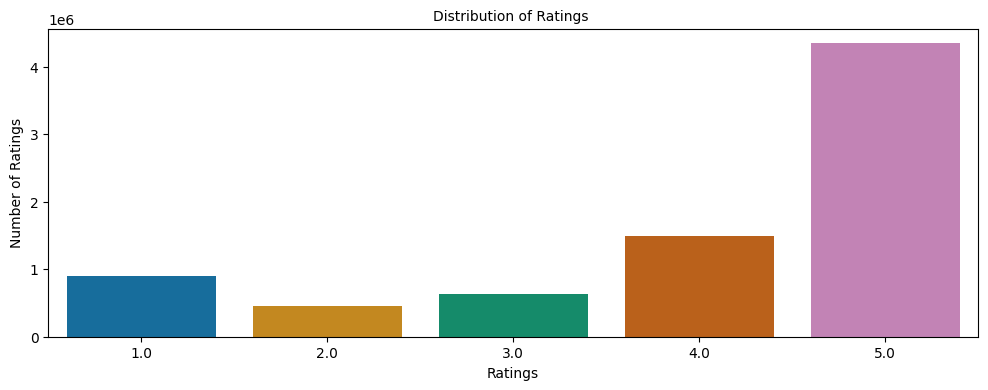

In [ ]:
# Distribution of ratings
plt.figure(figsize = (12, 4))
sns.countplot(x="rating", data=df, palette='colorblind')       # stat='percent',log_scale=True

plt.tick_params(labelsize = 10)
plt.title("Distribution of Ratings ", fontsize = 10)
plt.xlabel("Ratings", fontsize = 10)
plt.ylabel("Number of Ratings", fontsize = 10)
plt.show()



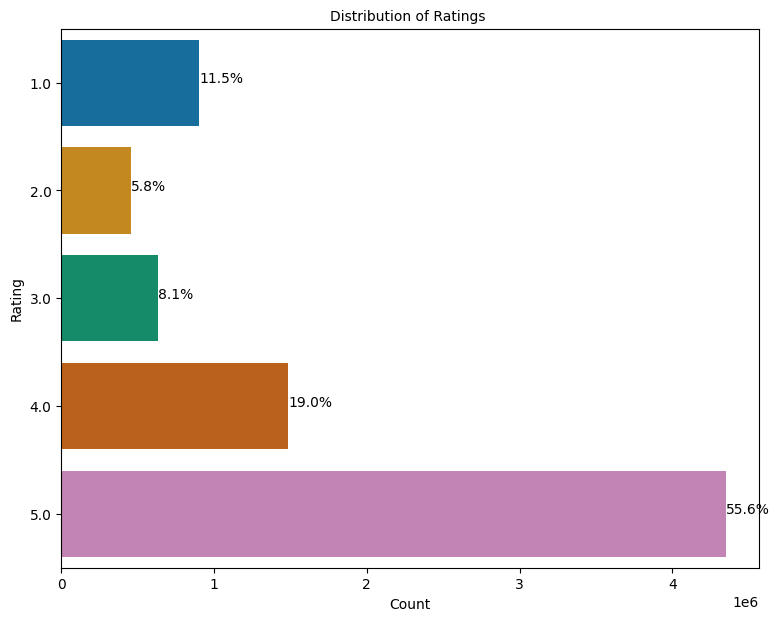

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style('whitegrid')

plt.figure(figsize=(9,7))

# Create the countplot and naming it 'plot'.
plot = sns.countplot(y='rating', data=df, palette='colorblind')

plt.xlabel('Count')
plt.ylabel('Rating')
plt.title ("Distribution of Ratings ", fontsize = 10)

total = len(df['rating'])

for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y))
plt.show()

Observations:
The scale of ratings is from 1 to 5.
As per the countplot, the rating '5' has the highest count of ratings with 55.6% or >5000000 and accounts for the majority of the ratings.
Following this, Rating '4' and '1' with 19% and 11.5% observations, respecitvely.

In [ ]:
temp=df.groupby('prod_id').count()['rating']
temp

prod_id
0132793040     1
0321732944     1
0439886341     3
0511189877     6
0528881469    27
              ..
BT008G3W52     1
BT008SXQ4C     1
BT008T2BGK     1
BT008UKTMW    15
BT008V9J9U     1
Name: rating, Length: 476002, dtype: int64

In [ ]:
mostinteracted_products=df.groupby(['prod_id'])['rating'].count().sort_values(ascending=False)

In [ ]:
mostinteracted_products

prod_id
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B004WL91KI        1
B004WL9FK4        1
B004WL9Q2Q        1
B004WL9R8O        1
BT008V9J9U        1
Name: rating, Length: 476002, dtype: int64

**Observations**:
The book with prod_id: B0074BW614 has been interacted by most users (18244).
But still, there is a possibility of 4201696-18244 = 4,183,452 more interactions as we have 4,201,696 unique users in our dataset. For those 4,183,452 remaining users, we can build a recommendation system to predict who is most likely to interact with this product.
Also, out of these 18244 interactions, we need to consider the distribution of ratings as well to check whether this book is the most liked or most disliked product.

In [ ]:

mostinteracted_prod = df[df['prod_id'] == 'B0074BW614']['rating'].value_counts()
mostinteracted_prod

5.00000    12765
4.00000     3333
3.00000     1058
1.00000      564
2.00000      524
Name: rating, dtype: int64

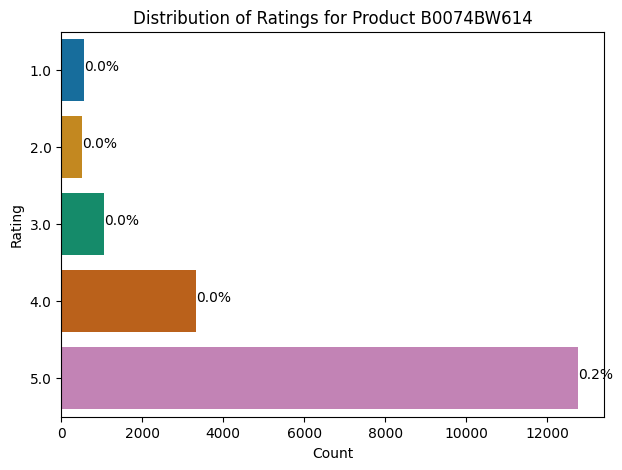

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style('whitegrid')

plt.figure(figsize=(7,5))

# Create the countplot and naming it 'plot'.
# Assuming 'df' is your DataFrame
selected_product = 'B0074BW614'

# Filter DataFrame for the specific product
selected_product_df = df[df['prod_id'] == selected_product]

plot = sns.countplot(y='rating', data=selected_product_df, palette='colorblind')

plt.xlabel('Count')
plt.ylabel('Rating')
plt.title (f'Distribution of Ratings for Product {selected_product}')

total = len(df['rating'])

for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y))
plt.show()

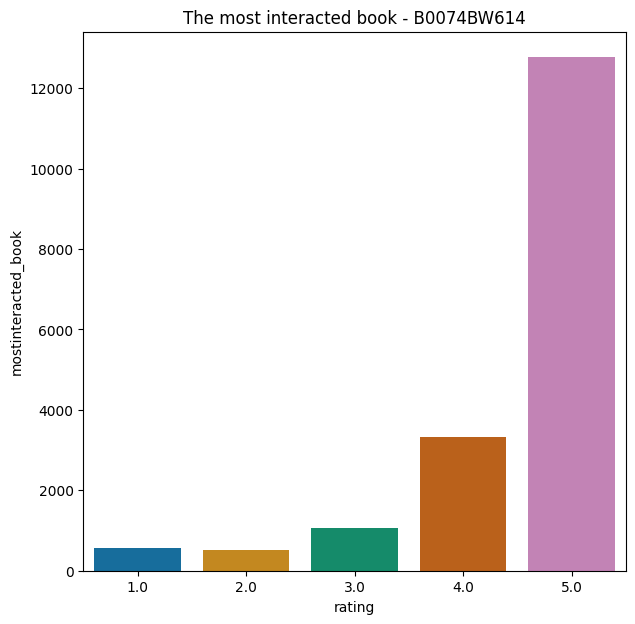

In [ ]:
# Plotting distributions of ratings for the most interacted book

plt.figure(figsize=(7,7))

mostinteracted_book=df[df['prod_id'] == 'B0074BW614'] #['rating'].value_counts().plot(kind='bar')

plot = sns.countplot(x='rating',data=mostinteracted_book, palette='colorblind')

plt.title('The most interacted book - B0074BW614')
plt.xlabel('rating')

plt.ylabel('mostinteracted_book')
plt.show()

In [26]:
# Get the column containing the users
users = df.user_id          #AKM1MP6P0OYPR

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [27]:
len(ratings_count)

4201696

In [28]:
ratings_count['AKM1MP6P0OYPR']

2

In [ ]:
import collections

sorted_userratings = collections.OrderedDict(sorted(ratings_count.items()))
sorted_userratings

In [29]:
i=0
for key, value in sorted(ratings_count.items(),reverse=True, key=lambda item: item[1]):
    #print("%s: %s" % (key, value))
    if value >= 50:
       i+=1
       #print("%s: %s" % (key, value))
       #if i == 25:
        #  break
print('ratings >= 50:',i)

ratings >= 50: 1540


In [30]:
RATINGS_CUTOFF = 50

keep_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings >= RATINGS_CUTOFF:
        keep_users.append(user)

df_keep = df.loc[df.user_id.isin(keep_users)]

In [31]:
len(df_keep)      # 125871  -- Cross check

125871

In [32]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [36]:
df.shape

(125871, 3)

In [33]:
df_temp=df.groupby(['prod_id'])['rating']
df_temp

In [37]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
prod_ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in prod_ratings_count:
        prod_ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        prod_ratings_count[prod] = 1

In [38]:
len(prod_ratings_count)

48190

In [39]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_prod = []

for user, num_ratings in prod_ratings_count.items():
    if num_ratings <= RATINGS_CUTOFF:
        remove_prod.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_prod)]

In [40]:
df_final.shape

(59880, 3)

In [41]:
len(df_final)         #59880

59880

In [42]:
df_final['user_id'].nunique()

1540

In [43]:
df_final['prod_id'].nunique()

4607

In [ ]:
# Print a few rows of the imported dataset
df_final.head(30)

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0
1485,A19N3S7CBSU6O7,1400501466,5.0
2082,A2ZR3YTMEEIIZ4,1400532655,5.0
2150,A3CLWR1UUZT6TG,1400532655,5.0
2162,A5JLAU2ARJ0BO,1400532655,1.0
2228,A1P4XD7IORSEFN,1400532655,4.0


In [ ]:
mostinteracted_products2=df_final.groupby(['prod_id'])['rating'].count().sort_values(ascending=False)

In [ ]:
mostinteracted_products2

prod_id
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
             ... 
B009FU8BTI      6
B002UOR17Y      6
B002TOJXMQ      6
B002TLTIS8      6
1400501466      6
Name: rating, Length: 4607, dtype: int64

In [44]:
value_counts = df_final.apply(pd.value_counts)

In [ ]:
value_counts

,user_id,prod_id,rating
1.0,NaN,NaN,1670.00000
2.0,NaN,NaN,2273.00000
3.0,NaN,NaN,5982.00000
4.0,NaN,NaN,16762.00000
5.0,NaN,NaN,33193.00000
...,...,...,...
B00KYMCJF8,NaN,8.00000,NaN
B00L21HC7A,NaN,16.00000,NaN
B00L2442H0,NaN,12.00000,NaN
B00L26YDA4,NaN,13.00000,NaN


## **Exploratory Data Analysis**

### **Shape of the data**

In [ ]:
# Check the number of rows and columns and provide observations of products which have atleast 5 ratings from users who has given atleast 50 ratings
rows, columns = df_final.shape
print("No of rows: ", rows)
print("No of columns: ", columns)

No of rows:  59880
No of columns:  3


**Write your observations here:______**

*   No of rows:  59880
*   No of columns:  3

### **Data types**

In [ ]:
# Check Data types and provide observations
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59880 entries, 1310 to 7824221
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  59880 non-null  object 
 1   prod_id  59880 non-null  object 
 2   rating   59880 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


**Write your observations here:______**

There 59880 rows of user_id, prod_id, and rating where user_id and prod_id are identified are objects and rating as float64.

### **Checking for missing values**

In [ ]:
# Check for missing values present and provide observations
df_final.isnull().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

**Write your observations here:______**

There are no null values in df_final

In [ ]:
df_final.nunique()

user_id    1540
prod_id    4607
rating        5
dtype: int64

In [ ]:
count_prod_interaction = df_final.groupby('prod_id').count()['rating']
count_prod_interaction

In [ ]:
sorted_counts = df_final.groupby('prod_id').count()['rating'].sort_values(ascending=False)

#sorted_counts.columns = ['prod_id', 'count']



prod_id
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
             ... 
B009FU8BTI      6
B002UOR17Y      6
B002TOJXMQ      6
B002TLTIS8      6
1400501466      6
Name: rating, Length: 4607, dtype: int64

The top 5 products with highest number of ratings
B0088CJT4U    206,
B003ES5ZUU    184,
B000N99BBC    167,
B007WTAJTO    164,
B00829TIEK    149

In [ ]:
top5 = sorted_counts.head(5)
top5

prod_id
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: rating, dtype: int64

In [ ]:
top5_ids = sorted_counts.index[:5]
top5_ids
selected_rows = df_final[df_final['prod_id'].isin(top5_ids)]
selected_rows

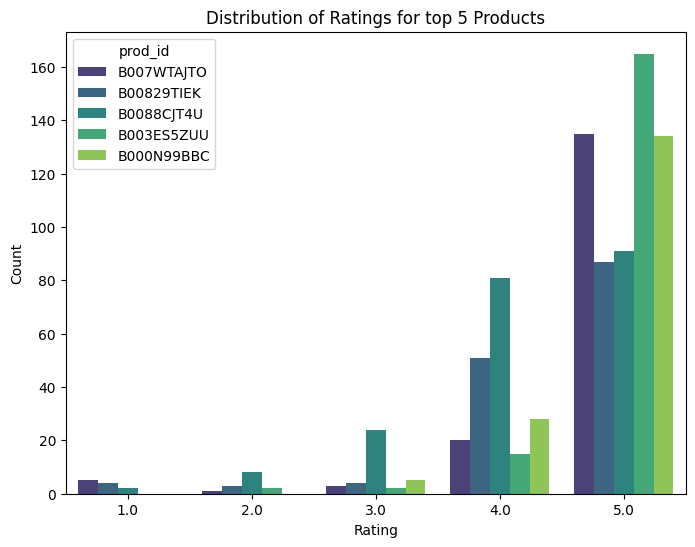

In [ ]:
# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', hue='prod_id', data=selected_rows, palette='viridis')

plt.title('Distribution of Ratings for top Products')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

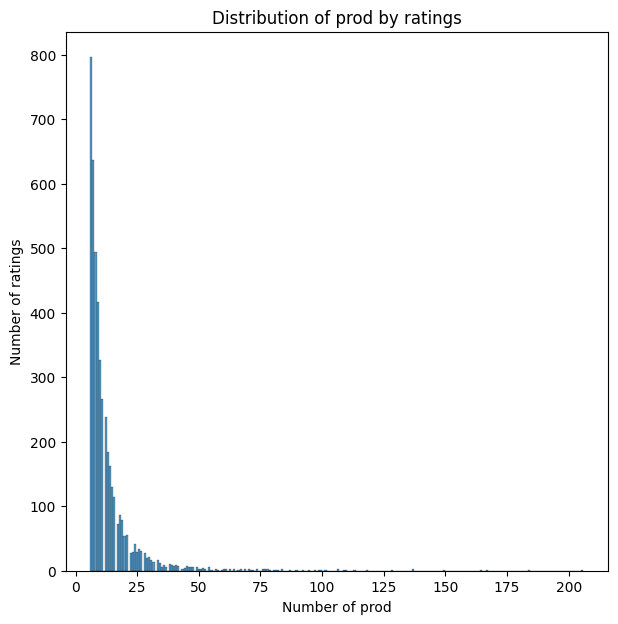

In [ ]:
# Plotting user-item interactions distribution


plt.figure(figsize=(7,7))

sns.histplot(data = count_prod_interaction, palette='colorblind')

plt.xlabel('Number of prod')
plt.ylabel('Number of ratings')
plt.title('Distribution of prod by ratings')

plt.show()

In [ ]:
# Finding user-prodcts interactions distribution
count_interactions = df_final.groupby('user_id').count()['prod_id']
count_interactions

user_id
A100UD67AHFODS    49
A100WO06OQR8BQ    73
A105S56ODHGJEK    56
A105TOJ6LTVMBG    29
A10AFVU66A79Y1    44
                  ..
AZBXKUH4AIW3X     21
AZCE11PSTCH1L     21
AZMY6E8B52L2T     92
AZNUHQSHZHSUE     26
AZOK5STV85FBJ     12
Name: prod_id, Length: 1540, dtype: int64

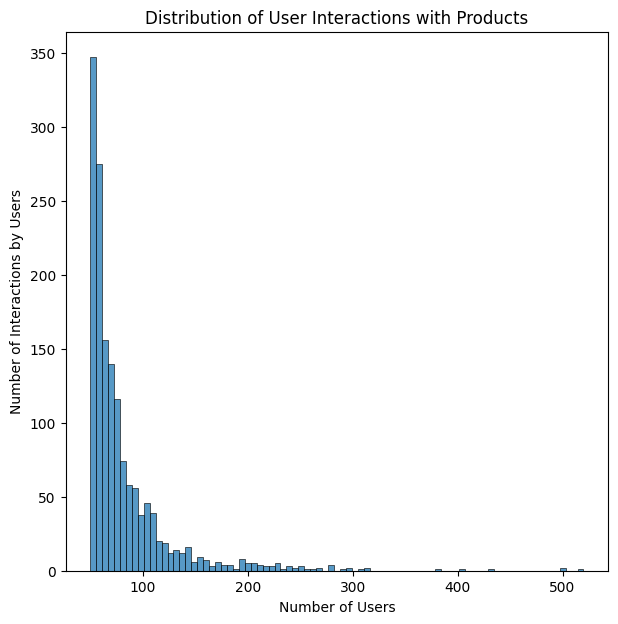

In [ ]:
# Plotting user-item interactions distribution

plt.figure(figsize=(7,7))

sns.histplot(data = count_interactions, palette='colorblind')

plt.xlabel('Number of Users')
plt.ylabel('Number of Interactions by Users')
plt.title('Distribution of User Interactions with Products')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Assuming count_interactions has a column 'Interactions' representing the number of interactions per user
sns.histplot(data=count_interactions,palette='colorblind')  # Adjust the number of bins as needed

plt.xlabel('Number of Users')
plt.ylabel('Number of Interactions by Users')
plt.title('Distribution of User Interactions')

plt.show()

Observations:
The distribution is highly skewed to the right.
It clearly shows that very few electronic products were purchased or  rated by the user.

### **Summary Statistics**

In [ ]:
# Summary statistics of 'rating' variable and provide observations
df_final['rating'].describe()

**Write your observations here:______**

**There are total 59880 records. **

*   Average / mean rating stands at 4.294840
*   with a std. dev of 0.98
*   rating ranged from 1 to 5
*   75% of ratings were 5 and 25% were 4





**  **



### **Checking the rating distribution**

In [ ]:
# Create the bar plot and provide observations
plt.figure(figsize = (7,7))

df_final['rating'].value_counts(1).plot(kind = 'bar')
plt.xlabel('Rating')

plt.ylabel('Count')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a color palette
colors = sns.color_palette('viridis', len(df_final['rating'].unique()))

# Create the bar plot and provide observations
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_final, palette=colors)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Electronics Products')
plt.show()

**Write your observations here:________**

### **Checking the number of unique users and items in the dataset**

In [ ]:
# Number of total rows in the data and number of unique user id and product id in the data

print('The number of observations in the final data = ', len(df_final))
print('Number of unique USERS in Raw data = ', df_final['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df_final['prod_id'].nunique())

**Write your observations here:________**


The number of observations in the final data =  59880

*   Number of unique USERS in Raw data =  1540
*   Number of unique ITEMS in Raw data =  4607

### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
most_rated = df_final.groupby('user_id').size().sort_values(ascending = False)[:10]
most_rated

- The highest number of **ratings by a user is 269 - (295)** which is far from the actual number of products present in the data. We can build a recommendation system to recommend products to users which they have not interacted with.

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
df_final.head()

,user_id,prod_id,rating
1310,1050,0,5.00000
1322,125,0,1.00000
1335,785,0,3.00000
1451,1495,0,5.00000
1456,164,0,1.00000


### Steps:

- **Create the final_rating DataFrame**
- **Complete the code to create the function top_n_products**
- **Recommending top 5 products with 50 minimum interactions based on popularity**
- **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
average_rating1 = df_final.groupby('prod_id').mean()['rating']
average_rating1

prod_id
1400501466   3.33333
1400532655   3.83333
9983891212   4.87500
B00000J1V5   4.57143
B00000JDF5   4.71429
               ...  
B00KYMCJF8   4.75000
B00L21HC7A   4.62500
B00L2442H0   4.91667
B00L26YDA4   4.38462
B00L3YHF6O   5.00000
Name: rating, Length: 4607, dtype: float64

In [ ]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values('avg_rating',ascending=False)

# See the first five records of the "final_rating" dataset
final_rating.head(10)

,avg_rating,rating_count
prod_id,,
B00L3YHF6O,5.00000,14
B005PQTYHE,5.00000,7
B000LRMR26,5.00000,6
B000L9OIQ2,5.00000,6
B005LDLP8W,5.00000,16
B005LJQMCK,5.00000,8
B00JWXTOIA,5.00000,7
B000JV9LUK,5.00000,10
B005NGQWL2,5.00000,6


In [ ]:
final_rating.sort_values('rating_count',ascending=False)

,avg_rating,rating_count
prod_id,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149
...,...,...
B00B9BUZW2,4.500000,6
B000EUFJXE,4.500000,6
B005E1CGZC,4.500000,6


In [ ]:
final_rating['rating_count'].value_counts()

6      796
7      637
8      495
9      416
10     327
      ... 
55       1
100      1
90       1
184      1
109      1
Name: rating_count, Length: 92, dtype: int64

In [ ]:
min_interaction=50
recommendations = final_rating[final_rating['rating_count'] > min_interaction]
recommendations

,avg_rating,rating_count
prod_id,,
1206,4.87179,78
1792,4.86413,184
904,4.85556,90
3085,4.82456,57
620,4.80952,84
...,...,...
4176,3.78571,84
3805,3.73077,78
948,3.61194,67


In [56]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions

def top_n_products(final_rating, n, min_interaction):

    # Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count'] > min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by='avg_rating', ascending=False)

    return recommendations.index[:n]



### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [57]:
res = list(top_n_products(final_rating, 5, 50))
# ID's of the Products
list_of_prods = []
for i in res:
  filtered_df = df[df['prod_id'] == str(i)]
  if not filtered_df.empty:
    list_of_prods.append(df[df['prod_id']== str(i) ]['prod_id'].unique()[0])
list_of_prods



['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

**Top 5 products with 50 minimum interactions based on popularity**

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [58]:
res = list(top_n_products(final_rating, 5, 100))
# ID's of the Products
list_of_prods = []
for i in res:
  filtered_df = df[df['prod_id'] == str(i)]
  if not filtered_df.empty:
    list_of_prods.append(df[df['prod_id']== str(i) ]['prod_id'].unique()[0])
list_of_prods

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

**Top 5 products with 100 minimum interactions based on popularity**
['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system. For example -
<ol>
    <li><b>Ratings</b> provided by users. For example, ratings of books on goodread, movie ratings on imdb, etc.</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos.</li>
    <li><b>Use/buying</b> of a product by users. For example, buying different items on e-commerce sites.</li>
    <li><b>Reading</b> of articles by readers on various blogs.</li>
</ol>

**Types of Collaborative Filtering**

- Similarity/Neighborhood based

 * User-User Similarity Based  
 * Item-Item similarity based

- Model based

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
!pip install surprise

In [59]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [60]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)
    accuracy.mae(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 (meaning that any rating equal to or higher than 3.5 is considered a relevant recommendation. Ratings below this threshold are not considered relevant for the evaluation.) and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [ ]:
from collections import defaultdict
from surprise import accuracy  # Import the necessary module for accuracy if not done already

def precision_recall_at_k_2(model, testset, k=5, threshold=4.5):
    """Return precision and recall at k metrics for each user"""

    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    # F1 score calculation with a check for division by zero
    f1_score = round((2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0, 3)

    return precision, recall, f1_score




In [61]:
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.00000
1322,A1A5KUIIIHFF4U,1400501466,1.00000
1335,A2XIOXRRYX0KZY,1400501466,3.00000
1451,AW3LX47IHPFRL,1400501466,5.00000
1456,A1E3OB6QMBKRYZ,1400501466,1.00000




*   Precision measures the accuracy of the positive predictions or recommendations made by a system.
*   Recall measures the ability of a system to identify all the relevant items, capturing the proportion of actual relevant items that were successfully retrieved by the system. Recall is particularly important when the goal is to avoid missing relevant items, even if it means having some false positives.



In [ ]:
from sklearn.preprocessing import LabelEncoder
tempdata=df_final[['user_id','prod_id']].apply(LabelEncoder().fit_transform)
tempdata['rating']=df_final['rating']
#df_final = tempdata.copy()
tempdata.head()

In [ ]:
# Creating a copy of the above dataset for further use
df_rating = tempdata.copy()

In [ ]:
# Calculating average ratings
average_rating = tempdata.groupby('prod_id').mean()['rating']

# Calculating the count of ratings
count_rating = tempdata.groupby('prod_id').count()['rating']

# Updating the final_rating dataframe with the new encoded book_id count and average of ratings based on the new dataframe
final_rating_tempdata = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})
final_rating_tempdata.head()

In [62]:
df_final.shape

(59880, 3)

In [63]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (1, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

- **Initialize the KNNBasic model using sim_options provided, Verbose=False, and setting random_state=1**

- **Fit the model on the training data**

- **Use the precision_recall_at_k function to calculate the metrics on the test data**

- **Provide your observations on the output**

In [64]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': True}

# Initialize the KNNBasic model using sim_options provided, Verbose = False, and setting random_state = 1
sim_user_user = KNNBasic(sim_options=sim_options,verbose = False,random_state = 42)

# Fit the model on the training data
sim_user_user.fit(trainset)

In [ ]:
# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)

RMSE: 1.0021
MAE:  0.7092
Precision:  0.855
Recall:  0.87
F_1 score:  0.862


**Write your observations here:__________**

### RMSE: 1.0021
A lower RMSE indicates better predictive accuracy. In this case, an RMSE of 1.0021 suggests that, on average, the predictions made by the recommendation system are approximately 1.0021 units away from the actual ratings.

In a 1 to 5 rating system, an error of one rating point might be considered acceptable, especially when users do not expect extremely precise recommendations in domains like Retail or eCommerce.

### Precision : 0.855
   The value of 0.855 suggests that 85.5% of the recommended items are relevant. This is a good precision value, indicating a relatively low rate of false positives.

###   Recall:  0.87
  The value of 0.87 indicates that the system is able to capture 87% of all relevant items. This is a good recall value, suggesting that the system is effective at identifying relevant items.

###   F_1 score:  0.862
  The value of 0.862 shows a good balance between precision and recall. A higher F1 score is generally desirable.


Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5 which is denoted by the parameter r_ui.

In [ ]:
# Example of using the function
precision, recall, f1_score = precision_recall_at_k_2(sim_user_user, testset)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Precision: 0.623
Recall: 0.477
F1 Score: 0.54


In [ ]:
def calculate_fp_fn(precision, recall, f1_score):
    # Calculate True Positives (TP) using the F1 Score formula
    tp = f1_score * (2 * precision) / (precision + recall)

    # Calculate False Positives (FP) using the Precision formula
    fp = 2 * precision * tp - precision

    # Calculate False Negatives (FN) using the Recall formula
    fn = 2 * tp - recall * fp / (1 - recall)

    return fp, fn


In [ ]:
# Given Precision, Recall, and F1 Score
#precision= 0.847
#recall= 0.925
#f1_score=  0.884

# Calculate False Positives (FP) and False Negatives (FN)
false_positive, false_negative = calculate_fp_fn(precision, recall, f1_score)

# Print the results
print('False Positive:', false_positive)
print('False Negative:', false_negative)

False Positive: 0.1391442181818182
False Negative: 1.0964395423605076


In [65]:
df_final[(df_final['user_id']=='A3LDPF5FMB782Z') & (df_final['prod_id']=='1400501466')]


,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.00000


In [66]:
df_final[(df_final['user_id']!='A3LDPF5FMB782Z') & (df_final['prod_id']=='1400501466')]

,user_id,prod_id,rating
1322,A1A5KUIIIHFF4U,1400501466,1.00000
1335,A2XIOXRRYX0KZY,1400501466,3.00000
1451,AW3LX47IHPFRL,1400501466,5.00000
1456,A1E3OB6QMBKRYZ,1400501466,1.00000
1485,A19N3S7CBSU6O7,1400501466,5.00000


In [67]:
# Predicting rating for a sample user with an interacted product

sim_user_user.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 3.40   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=3.4, details={'actual_k': 5, 'was_impossible': False})

**Write your observations here:__________**
* uid is the user identifier.
* iid is the item identifier.
* r_ui is the actual rating provided by the user.
* est is the estimated (predicted) rating.
* details provides additional information about the prediction, including the number of actual neighbors used and whether the prediction was possible.

** the above similarity based algorithm predicted a rating of 3.4 for the user A3LDPF5FMB782Z for the item 1400501466, and this prediction is based on information from 5 similar users. The prediction was possible (was_impossible is False). **


Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [68]:
df_final[df_final['prod_id'] == '1400501466']

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.00000
1322,A1A5KUIIIHFF4U,1400501466,1.00000
1335,A2XIOXRRYX0KZY,1400501466,3.00000
1451,AW3LX47IHPFRL,1400501466,5.00000
1456,A1E3OB6QMBKRYZ,1400501466,1.00000
1485,A19N3S7CBSU6O7,1400501466,5.00000


In [69]:
df_final[(df_final['user_id'] == 'A2UOHALGF2X77Q')]

,user_id,prod_id,rating
160938,A2UOHALGF2X77Q,B000068O34,5.00000
260714,A2UOHALGF2X77Q,B00008Y0VN,5.00000
383835,A2UOHALGF2X77Q,B0001FTVE0,5.00000
567608,A2UOHALGF2X77Q,B0006I1TRY,4.00000
593118,A2UOHALGF2X77Q,B0007LJHVA,5.00000
...,...,...,...
7760402,A2UOHALGF2X77Q,B00HPMCO4Q,4.00000
7769631,A2UOHALGF2X77Q,B00HVT27B8,5.00000
7801816,A2UOHALGF2X77Q,B00IVPU786,5.00000
7803820,A2UOHALGF2X77Q,B00IYU7XTE,4.00000


In [70]:
df_final.shape

(59880, 3)

In [71]:
users_interacted_with_product = df_final[df_final['prod_id'] != '1400501466']
users_interacted_with_product.head(30)

,user_id,prod_id,rating
2082,A2ZR3YTMEEIIZ4,1400532655,5.00000
2150,A3CLWR1UUZT6TG,1400532655,5.00000
2162,A5JLAU2ARJ0BO,1400532655,1.00000
2228,A1P4XD7IORSEFN,1400532655,4.00000
2363,A341HCMGNZCBIT,1400532655,5.00000
2437,A3HPCRD9RX351S,1400532655,3.00000
6147,A1C82BC5GNABOA,9983891212,5.00000
6208,A1VHCO8RQFIGQJ,9983891212,4.00000
6209,A2Z9S2RQD542CP,9983891212,5.00000
6210,A2QIC4G483SQQA,9983891212,5.00000


In [72]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    #print(all_users.difference(users_interacted_with_product))
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [73]:
temp = n_users_not_interacted_with(5, df_final, '1400501466')
temp

['A6XLG77BC9R8R',
 'ANYC38I00IRVK',
 'A1TFDMY4YNTV97',
 'A30J7WQV0ZNRXG',
 'A2S26YGSVXBCFL']

* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.**

In [74]:
df_final[(df_final['user_id']=='A2UOHALGF2X77Q') & (df_final['prod_id']=='1400501466')]

,user_id,prod_id,rating


In [75]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict("A2UOHALGF2X77Q", "1400501466", verbose = True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 5.00   {'actual_k': 2, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=5, details={'actual_k': 2, 'was_impossible': False})

**Write your observations here:__________**

* uid is the user identifier.
* iid is the item identifier.
* r_ui is the actual rating provided by the user.
* est is the estimated (predicted) rating.
* details provides additional information about the prediction, including the number of actual neighbors used and whether the prediction was possible.

** the above similarity based algorithm predicted a rating of **5** for the user A2UOHALGF2X77Q who never interacted with the item 1400501466, and this prediction is based on information from 5 similar users. The prediction was possible (was_impossible is False). **



### **Improving Similarity-based Recommendation System by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [76]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9664783389338972
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above.

Optimal values suggested by GridSearchCV

0.9653394317219819 -- reflects the model's accuracy or effectiveness in making recommendations with the below hyperparameters
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}}


Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [77]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k=40, min_k=6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9461
MAE:  0.7208
Precision:  0.848
Recall:  0.91
F_1 score:  0.878


**Write your observations here:**____________

*   RMSE: 0.9461
*   Precision:  0.848
*   Recall:  0.91
*   F_1 score:  0.878

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [79]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
# Here the user has already interacted or watched the product with productId '1400501466'
# and given a rating of 5 which is denoted by the parameter r_ui.
sim_user_user_optimized.predict('A3LDPF5FMB782Z','1400501466',r_ui=5,verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.293942050768203, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:**____________

* uid is the user identifier.
* iid is the item identifier.
* r_ui is the actual rating provided by the user.
* est is the estimated (predicted) rating.
* details provides additional information about the prediction, including the number of actual neighbors used and whether the prediction was possible.

** the above similarity based algorithm predicted a rating of 4.29 for the user A3LDPF5FMB782Z for the item 1400501466, and this prediction was impossible because there were not enough neighbors **

In [78]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
sim_user_user_optimized.predict('A2UOHALGF2X77Q','1400501466',verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.293942050768203, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

Write your observations here:____
uid is the user identifier.
iid is the item identifier.
r_ui is the actual rating provided by the user.
est is the estimated (predicted) rating.
details provides additional information about the prediction, including the number of actual neighbors used and whether the prediction was possible.
** the above similarity based algorithm predicted a rating of 4.29 for the user A2UOHALGF2X77Q for the item 1400501466, and the prediction was impossible because there were not enough neighbors **

### **Identifying similar Users to a given User (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
sim_user_user_optimized.predict(0,'1400501466',r_ui=5,verbose=True)

user: 0          item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=0, iid='1400501466', r_ui=5, est=4.293942050768203, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# 0 is the inner id of the user
sim_user_user_optimized.get_neighbors(0, 5)

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [80]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [81]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_user_user_optimized)

In [82]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B000N99BBC,5
1,B001342KM8,5
2,B001MSU1FS,5
3,B001TH7GUU,5
4,B001TZWNF0,5


Write your observations here:____


index	  prod_id	  predicted_ratings
0	    B000N99BBC	5
1	    B001342KM8	5
2	    B001MSU1FS	5
3	    B001TH7GUU	5
4	    B001TZWNF0	5


 > The products listed (identified by their prod_id) are the top recommendations for the user "A3LDPF5FMB782Z" based on the collaborative filtering algorithm used (sim_user_user_optimized)

>The predicted ratings are all 5, indicating a strong predicted preference for these products by the user.



**Correcting the Ratings and Ranking the above
Products____**

While comparing the ratings of two products or items, it is not only the **ratings** that describe the **likelihood of the user to that product**. Along with the rating the **number of users who used or interacted with that product** also becomes a important point to consider. Due to this, we have calculated the **"corrected_ratings"** for each product. Commonly higher the **"rating_count" of a product more reliable the rating is**. To interpret the above concept, a **product rated 5 with rating_count 5 is less liked in comparison to a book rated 4 with a rating count of 50**. It has been **empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product**.

In [83]:
def ranking_prods(recommendations, final_rating):
  # Sort the books based on ratings count
  ranked_prod = final_rating.loc[[items[0] for items in recommendations]].sort_values('rating_count', ascending=False)[['rating_count']].reset_index()

  # Merge with the recommended books to get predicted ratings
  ranked_prods = ranked_prod.merge(pd.DataFrame(recommendations, columns=['prod_id', 'predicted_ratings']), on='prod_id', how='inner')

  # Rank the books based on corrected ratings
  ranked_prods['corrected_ratings'] = ranked_prods['predicted_ratings'] - 1 / np.sqrt(ranked_prods['rating_count'])

  # Sort the books based on corrected ratings
  ranked_prods = ranked_prods.sort_values('corrected_ratings', ascending=False)

  return ranked_prods

Note: In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some books with ratings 5 and we can't have a rating more than 5 for a given product.

In [84]:
# Calculate the average rating for each product
average_rating = df_final.groupby('prod_id').mean()['rating']

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id').count()['rating']

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values('avg_rating',ascending=False)

sorted_final_rating = final_rating.sort_values('rating_count',ascending=False)
# See the first five records of the "final_rating" dataset
sorted_final_rating.head(10)

,avg_rating,rating_count
prod_id,,
B0088CJT4U,4.21845,206
B003ES5ZUU,4.86413,184
B000N99BBC,4.77246,167
B007WTAJTO,4.70122,164
B00829TIEK,4.43624,149
B008DWCRQW,4.09489,137
B00829THK0,4.41606,137
B002R5AM7C,4.12500,128
B004CLYEDC,4.66949,118


In [85]:
# Applying the ranking_products function and sorting it based on corrected ratings
ranking_prods(recommendations, sorted_final_rating)

,prod_id,rating_count,predicted_ratings,corrected_ratings
0,B000N99BBC,167,5,4.92262
1,B001TH7GUU,78,5,4.88677
2,B001MSU1FS,30,5,4.81743
3,B001TZWNF0,23,5,4.79149
4,B001342KM8,17,5,4.75746


In [87]:

recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, sim_user_user_optimized)

In [88]:
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,B003ES5ZUU,4.87323
1,1400532655,4.29394
2,9983891212,4.29394
3,B00000J1V5,4.29394
4,B00000JDF5,4.29394


In [89]:
# Applying the ranking_products function and sorting it based on corrected ratings
ranking_prods(recommendations, sorted_final_rating)

,prod_id,rating_count,predicted_ratings,corrected_ratings
0,B003ES5ZUU,184,4.87323,4.79951
1,9983891212,8,4.29394,3.94039
2,B00000J1V5,7,4.29394,3.91598
3,B00000JDF5,7,4.29394,3.91598
4,1400532655,6,4.29394,3.88569


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 42, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 0.9924
MAE:  0.7039
Precision:  0.836
Recall:  0.864
F_1 score:  0.85


**Write your observations here:**____________

*   RMSE: 0.9924
*   Precision:  0.836
*   Recall:  0.864
*   F_1 score:  0.85

We can observe that the baseline model has RMSE=0.9924 & F_1 Score=0.85 on the test set.
We can try to improve the performance number by using GridSearchCV to tune different hyperparameters of this algorithm.

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`**. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product
sim_item_item.predict('A3LDPF5FMB782Z','1400501466',r_ui=5,verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.50   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.5, details={'actual_k': 20, 'was_impossible': False})

**Write your observations here:**____________

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.50   {'actual_k': 20, 'was_impossible': False}
Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.5, details={'actual_k': 20, 'was_impossible': False})

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A2UOHALGF2X77Q','1400501466',verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 5.00   {'actual_k': 2, 'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=5, details={'actual_k': 2, 'was_impossible': False})

**Write your observations here:**____________

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 5.00   {'actual_k': 2, 'was_impossible': False}
Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=5, details={'actual_k': 2, 'was_impossible': False})

### **Hyperparameter tuning the item-item similarity-based model**

- Use the following values for the param_grid and tune the model
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (1, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 42)

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10,20,30], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs2 = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs = -1)

# Fitting the data
gs2.fit(data)

# Find the best RMSE score
print(gs2.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs2.best_params['rmse'])

0.9707148753166784
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

0.9703113564266689
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options , k=30 , min_k=6 , random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9520
MAE:  0.7161
Precision:  0.841
Recall:  0.901
F_1 score:  0.87


**Write your observations here:__________**

** Before tuning hyperparameters **
* RMSE: 0.9924
* Precision:  0.836
* Recall:  0.864
* F_1 score:  0.85

** After tuning hyperparameters **
*   RMSE: 0.9520
*   Precision:  0.841
*   Recall:  0.901
*   F_1 score:  0.87


- We observe that after tuning hyperparameters, RMSE for the test set has reduced to 0.9520 from 0.9924. F_1 score of the tuned model is also slightly better than the baseline model. So, the model performance has improved slightly after hyperparameter tuning.

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
sim_item_item_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.79   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.794871794871795, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
sim_item_item_optimized.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.293942050768203, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Write your observations here:__________**

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.79   {'actual_k': 20, 'was_impossible': False}
Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.794871794871795, details={'actual_k': 20, 'was_impossible': False})


user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}
Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.293942050768203, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
sim_item_item_optimized.get_neighbors(0, k=5)

[26, 34, 36, 57, 59]

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A3LDPF5FMB782Z", 5, sim_item_item_optimized)
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, "A1A5KUIIIHFF4U", 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])

,prod_id,predicted_ratings
0,1400532655,4.29394
1,9983891212,4.29394
2,B00000J1V5,4.29394
3,B00000JDF5,4.29394
4,B00000JDF6,4.29394


**Write your observations here:__________**

   prod_id	  predicted_ratings
0	1400532655	4.293942
1	9983891212	4.293942
2	B00000J1V5	4.293942
3	B00000JDF5	4.293942
4	B00000JDF6	4.293942


In [ ]:
# Applying the ranking_books function and sorting it based on corrected ratings
ranking_prods(recommendations, sorted_final_rating)

,prod_id,rating_count,predicted_ratings,corrected_ratings
0,9983891212,8,4.29394,3.94039
1,B00000J1V5,7,4.29394,3.91598
2,B00000JDF5,7,4.29394,3.91598
3,B00000JDF6,7,4.29394,3.91598
4,1400532655,6,4.29394,3.88569


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

## **Model 3: Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)
    accuracy.mae(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

In [104]:
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=42)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.8852
MAE:  0.6538
Precision:  0.85
Recall:  0.895
F_1 score:  0.872


In [ ]:
predictions = svd.test(testset)
rmse = accuracy.rmse(predictions)


**Write your observations here:___________**

### SVD
* RMSE: 0.8856
* Precision:  0.851
* Recall:  0.893
* F_1 score:  0.871



> To validate a test set on a trained Singular Value Decomposition (SVD) model, you typically follow these steps:

Split your dataset: Divide your data into three parts: a training set, a validation set, and a test set. The training set is used to train the model, the validation set is used to optimize hyperparameters, and the test set is used to evaluate the final model's performance on unseen data 1.
Choose hyperparameters: Run the SVD algorithm with different values of k (the number of latent factors) and evaluate their performance on the validation set. Choose the k value that gives the lowest Root Mean Square Error (RMSE) 1.
Apply the model to the test set: Once you have selected the best k, apply the SVD model to the test set to evaluate its performance on new, unseen data 1.



**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [105]:
# Making prediction
svd.predict("A3LDPF5FMB782Z", "1400501466", r_ui = 5, verbose = True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.49   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.490073623101254, details={'was_impossible': False})

**Write your observations here:___________**

> user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.29   {'was_impossible': False}
Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.2930580242420655, details={'was_impossible': False})



**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [106]:
# Making prediction
svd.predict("A2UOHALGF2X77Q", "1400501466", verbose = True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.03   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.0269396627348994, details={'was_impossible': False})

**Write your observations here:___________**

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 4.03   {'was_impossible': False}
Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=4.0269396627348994, details={'was_impossible': False})

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [107]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

0.8923867803492774
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.4}


0.8938694735186002
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.4}

Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [108]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state = 1
svd_optimized = SVD(n_epochs=20, lr_all=0.01, reg_all=0.4, random_state=42)

# Train the algorithm on the train set
svd_optimized=svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.8783
MAE:  0.6549
Precision:  0.854
Recall:  0.901
F_1 score:  0.877


**Write your observations here:_____________**

> RMSE: 0.8784
Precision:  0.853
Recall:  0.9
F_1 score:  0.876



**Let's now predict a rating for a user with `userId = "A3LDPF5FMB782Z"` and `productId = "1400501466"` with the optimized model.**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [109]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
svd_optimized.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5, verbose=True)

user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.24   {'was_impossible': False}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.237687117765776, details={'was_impossible': False})

In [110]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
svd_optimized.predict('A2UOHALGF2X77Q', '1400501466', verbose=True)

user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 3.95   {'was_impossible': False}


Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=3.950361689026588, details={'was_impossible': False})

**Write your observations

1. user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.24   {'was_impossible': False}
Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.237687117765776, details={'was_impossible': False})
2.   user: A2UOHALGF2X77Q item: 1400501466 r_ui = None   est = 3.95   {'was_impossible': False}
Prediction(uid='A2UOHALGF2X77Q', iid='1400501466', r_ui=None, est=3.950361689026588, details={'was_impossible': False})

here:**_____________

In [115]:
# Getting top 5 recommendations for user_id 1 using "svd_optimized" algorithm
svd_recommendations1 = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, svd_optimized)
svd_recommendations1

[('B005PQTYHE', 4.053062597475375),
 ('B00004RC2D', 4.014542667901601),
 ('B0033PRWSW', 4.004980964681068),
 ('B000JV9LUK', 4.004078935424248),
 ('B001I45T9O', 3.9944773132776357)]

In [113]:
ranking_prods(svd_recommendations1, sorted_final_rating)

,prod_id,rating_count,predicted_ratings,corrected_ratings
0,B0033PRWSW,15,4.00498,3.74678
1,B000JV9LUK,10,4.00408,3.68785
4,B005PQTYHE,7,4.05306,3.67510
2,B00004RC2D,8,4.01454,3.66099
3,B001I45T9O,8,3.99448,3.64092


In [116]:
# Getting top 5 recommendations for user_id 1 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, svd_optimized)


In [101]:
svd_recommendations

[('B000JV9LUK', 5),
 ('B00004XOM3', 4.975251410466291),
 ('B000VDCTCI', 4.957048501727368),
 ('B00IVPU6AA', 4.955580303177414),
 ('B0055CAR7Y', 4.955257693238606)]

In [102]:
# Ranking book based on above recommendations
ranking_prods(svd_recommendations, sorted_final_rating)

,prod_id,rating_count,predicted_ratings,corrected_ratings
0,B00004XOM3,14,4.97525,4.70799
1,B00IVPU6AA,14,4.95558,4.68832
2,B000JV9LUK,10,5.00000,4.68377
3,B000VDCTCI,9,4.95705,4.62372
4,B0055CAR7Y,9,4.95526,4.62192


In [119]:
# Getting top 5 recommendations for user_id 1 using "svd_optimized" algorithm
svd_recommendations2 = get_recommendations(df_final, 'A2UOHALGF2X77Q', 5, svd_optimized)
svd_recommendations2

[('B000JV9LUK', 4.849344758137759),
 ('B00004XOM3', 4.812532625504765),
 ('B00IVPU6AA', 4.7983993248209575),
 ('B000VDCTCI', 4.7904226977893964),
 ('B00AR95ESC', 4.779298815278461)]

In [120]:
temp = n_users_not_interacted_with(5, df_final, '1400501466')
temp

['A6XLG77BC9R8R',
 'ANYC38I00IRVK',
 'A1TFDMY4YNTV97',
 'A30J7WQV0ZNRXG',
 'A2S26YGSVXBCFL']

In [123]:
svd_recommendations3 = get_recommendations(df_final, 'A6XLG77BC9R8R', 5, svd_optimized)
svd_recommendations3

[('B00004XOM3', 5),
 ('B000053HH5', 5),
 ('B00006B81E', 5),
 ('B00006HSYC', 5),
 ('B00007E89K', 5)]

In [124]:
svd_recommendations4 = get_recommendations(df_final, 'ANYC38I00IRVK', 5, svd_optimized)
svd_recommendations4

[('B000JV9LUK', 4.687896929031697),
 ('B00IVPU6AA', 4.640030934419773),
 ('B000VDCTCI', 4.637829648220186),
 ('B00004XOM3', 4.630886431986005),
 ('B005PQTYHE', 4.62578020485365)]

In [125]:
svd_recommendations5 = get_recommendations(df_final, 'A1TFDMY4YNTV97', 5, svd_optimized)
svd_recommendations5

[('B000JV9LUK', 4.880656955506071),
 ('B0035FZ12O', 4.8695388589283395),
 ('B005PQTYHE', 4.854978276536302),
 ('B00IVPU6AA', 4.8524539744351864),
 ('B00B4GGW5Q', 4.851520713599301)]

In [126]:
svd_recommendations6 = get_recommendations(df_final, 'A30J7WQV0ZNRXG', 5, svd_optimized)
svd_recommendations6

[('B000JV9LUK', 4.9728219138802325),
 ('B000VDCTCI', 4.930641389112918),
 ('B00IVPU6AA', 4.9197418855957835),
 ('B009OBCAW2', 4.918656397790267),
 ('B00004XOM3', 4.918139228890885)]

In [127]:
svd_recommendations7 = get_recommendations(df_final, 'A2S26YGSVXBCFL', 5, svd_optimized)
svd_recommendations7

[('B000JV9LUK', 4.783017607856756),
 ('B000VDCTCI', 4.763478655833155),
 ('B00004XOM3', 4.7484004218677685),
 ('B00AR95ESC', 4.737883994282969),
 ('B00IVPU6AA', 4.734037097589232)]

### **Conclusion and Recommendations**

**Write your conclusion and recommendations here**